In [105]:
#data cleaning

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('fivethirtyeight')
sns.set(style='whitegrid')
#sns.set(style='fivethirtyeight')

In [206]:
loan = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)

In [207]:
loan.shape

(39717, 111)

In [208]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [209]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing.loc[missing > 0]

emp_title                       6.19
emp_length                      2.71
desc                           32.58
title                           0.03
mths_since_last_delinq         64.66
                               ...  
tax_liens                       0.10
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 68, dtype: float64

In [210]:
columns_with_missing_values = list(missing[missing >= 50].index)

len(columns_with_missing_values)

57

In [211]:
loan = loan.drop(columns_with_missing_values,axis=1)
loan.shape

(39717, 54)

In [212]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [213]:
loan = loan.drop('desc',axis=1)

In [214]:

print("unique emp_title : %d"  % len(loan.emp_title.unique()))
print("unique emp_length : %d"  % len(loan.emp_length.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique revol_util : %d"  % len(loan.revol_util.unique()))
print("unique title : %d"  % len(loan.title.unique()))
print("unique last_pymnt_d : %d"  % len(loan.last_pymnt_d.unique()))
print("unique last_credit_pull_d : %d"  % len(loan.last_credit_pull_d.unique()))
print("unique collections_12_mths_ex_med : %d"  % len(loan.collections_12_mths_ex_med.unique()))
print("unique chargeoff_within_12_mths : %d"  % len(loan.chargeoff_within_12_mths.unique()))
print("unique pub_rec_bankruptcies : %d"  % len(loan.pub_rec_bankruptcies.unique()))
print("unique tax_liens : %d"  % len(loan.tax_liens.unique()))

unique emp_title : 28821
unique emp_length : 12
unique title : 19616
unique revol_util : 1090
unique title : 19616
unique last_pymnt_d : 102
unique last_credit_pull_d : 107
unique collections_12_mths_ex_med : 2
unique chargeoff_within_12_mths : 2
unique pub_rec_bankruptcies : 4
unique tax_liens : 2


In [215]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [216]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [217]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [218]:
loan.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [219]:
loan.tax_liens.unique()

array([ 0., nan])

In [220]:
drop_columnlist = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan = loan.drop(drop_columnlist,axis=1)

In [221]:
loan.shape

(39717, 50)

In [222]:
loan.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [223]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [224]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

emp_title       6.19
emp_length      2.75
title           0.03
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [225]:
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]

In [226]:
loan.shape

(36548, 50)

In [227]:
missing = round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

In [228]:
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]

In [229]:
loan.shape

(36433, 50)

In [230]:
missing =round(100*(loan.isnull().sum()/len(loan.id)), 2) 
missing[missing != 0]

Series([], dtype: float64)

In [231]:
loan.to_csv('clean_loan.csv', encoding='utf-8', index=False)

In [232]:
clean_loan = loan[:]#pd.read_csv('clean_loan.csv',encoding='utf-8')

In [233]:
clean_loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

In [234]:
columns_tobe_dropped = ['id','member_id','funded_amnt','funded_amnt_inv','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
clean_loan= clean_loan.drop(columns_tobe_dropped,axis=1)

In [235]:
clean_loan.shape

(36433, 38)

In [236]:
clean_loan.total_pymnt.value_counts().tail()

5517.160000     1
12878.238670    1
4348.288927     1
8954.809409     1
4608.000000     1
Name: total_pymnt, dtype: int64

In [237]:
clean_loan.total_rec_late_fee.value_counts().tail()

29.914662    1
23.820000    1
15.610000    1
59.781000    1
14.944409    1
Name: total_rec_late_fee, dtype: int64

In [238]:
clean_loan.collection_recovery_fee.value_counts().tail()

18.3264     1
198.4078    1
9.6738      1
33.2896     1
93.3678     1
Name: collection_recovery_fee, dtype: int64

In [239]:
clean_loan.total_pymnt= round(clean_loan.total_pymnt,2)
clean_loan.total_rec_late_fee= round(clean_loan.total_rec_late_fee,2)
clean_loan.collection_recovery_fee= round(clean_loan.collection_recovery_fee,2)

In [240]:
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
clean_loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             36433 non-null  object
 1   earliest_cr_line    36433 non-null  object
 2   last_pymnt_d        36433 non-null  object
 3   last_credit_pull_d  36433 non-null  object
dtypes: object(4)
memory usage: 1.4+ MB


In [241]:
clean_loan.issue_d = pd.to_datetime(clean_loan.issue_d, format='%b-%y')
clean_loan.earliest_cr_line = pd.to_datetime(clean_loan.earliest_cr_line, format='%b-%y')
clean_loan.last_pymnt_d = pd.to_datetime(clean_loan.last_pymnt_d, format='%b-%y')
clean_loan.last_credit_pull_d = pd.to_datetime(clean_loan.last_credit_pull_d, format='%b-%y')

In [242]:
clean_loan[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             36433 non-null  datetime64[ns]
 1   earliest_cr_line    36433 non-null  datetime64[ns]
 2   last_pymnt_d        36433 non-null  datetime64[ns]
 3   last_credit_pull_d  36433 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.4 MB


In [243]:
clean_loan.shape

(36433, 38)

In [244]:
clean_loan=clean_loan.drop_duplicates()

In [245]:
clean_loan.shape

(36433, 38)

In [246]:
clean_loan.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [247]:
clean_loan.revol_util.describe()

count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object

In [248]:
clean_loan['int_rate'] = clean_loan['int_rate'].str.strip('%').astype('float')
clean_loan['revol_util'] = clean_loan['revol_util'].str.strip('%').astype('float')

In [249]:
clean_loan[['int_rate','revol_util']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   int_rate    36433 non-null  float64
 1   revol_util  36433 non-null  float64
dtypes: float64(2)
memory usage: 853.9 KB


In [250]:
clean_loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [251]:
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [252]:
clean_loan = clean_loan.replace({"emp_length": emp_length_dict })

In [253]:
clean_loan.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

In [254]:
clean_loan.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

In [255]:
clean_loan['term'] = clean_loan.term.apply(lambda x: x.split()[0])

In [256]:
clean_loan.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

In [257]:
clean_loan['earliest_cr_line_month'] = clean_loan['earliest_cr_line'].dt.month
clean_loan['earliest_cr_line_year'] = clean_loan['earliest_cr_line'].dt.year

In [258]:
len(clean_loan[clean_loan['earliest_cr_line_year'] > 2011 ])

50

In [259]:
clean_loan[clean_loan['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

In [260]:
clean_loan.loc[clean_loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = clean_loan['earliest_cr_line_year'] - 100

In [261]:
clean_loan.groupby('earliest_cr_line_year').loan_amnt.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       2
1965       6
1966       7
1967      12
1968      12
1969      22
1970      35
1971      34
1972      33
1973      41
1974      51
1975      57
1976      73
1977      90
1978     130
1979     141
1980     150
1981     154
1982     196
1983     296
1984     360
1985     406
1986     447
1987     565
1988     671
1989     781
1990     944
1991     884
1992     970
1993    1398
1994    1860
1995    1974
1996    2074
1997    2271
1998    2645
1999    2763
2000    3034
2001    2363
2002    1794
2003    1740
2004    1639
2005    1406
2006    1079
2007     668
2008     144
Name: loan_amnt, dtype: int64

In [262]:
clean_loan['issue_d_month'] = clean_loan['issue_d'].dt.month
clean_loan['issue_d_year'] = clean_loan['issue_d'].dt.year

In [263]:
clean_loan.to_csv('master_loan.csv', encoding='utf-8', index=False)

In [264]:
clean_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36433 non-null  int64         
 1   term                     36433 non-null  object        
 2   int_rate                 36433 non-null  float64       
 3   installment              36433 non-null  float64       
 4   grade                    36433 non-null  object        
 5   sub_grade                36433 non-null  object        
 6   emp_title                36433 non-null  object        
 7   emp_length               36433 non-null  int64         
 8   home_ownership           36433 non-null  object        
 9   annual_inc               36433 non-null  float64       
 10  verification_status      36433 non-null  object        
 11  issue_d                  36433 non-null  datetime64[ns]
 12  loan_status              36433 n

In [265]:
objCol = list(clean_loan.columns[clean_loan.dtypes == 'object'])

In [266]:
clean_loan[objCol] = clean_loan[objCol].astype('string')

In [267]:
clean_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36433 non-null  int64         
 1   term                     36433 non-null  string        
 2   int_rate                 36433 non-null  float64       
 3   installment              36433 non-null  float64       
 4   grade                    36433 non-null  string        
 5   sub_grade                36433 non-null  string        
 6   emp_title                36433 non-null  string        
 7   emp_length               36433 non-null  int64         
 8   home_ownership           36433 non-null  string        
 9   annual_inc               36433 non-null  float64       
 10  verification_status      36433 non-null  string        
 11  issue_d                  36433 non-null  datetime64[ns]
 12  loan_status              36433 n

In [268]:
round(100 * (clean_loan == 0).sum(axis=0)/len(clean_loan), 2) 

loan_amnt                   0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   0.00
emp_length                 11.12
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
purpose                     0.00
title                       0.00
addr_state                  0.00
dti                         0.40
delinq_2yrs                89.17
earliest_cr_line            0.00
inq_last_6mths             48.66
open_acc                    0.00
pub_rec                    94.81
revol_bal                   2.31
revol_util                  2.34
total_acc                   0.00
out_prncp                  97.07
out_prncp_inv              97.07
total_pymnt                 0.00
total_pymnt_inv             0.37
total_rec_prncp             0.01
total_rec_

In [269]:
clean_loan['issue_d_month'] = clean_loan['issue_d'].dt.month
clean_loan['issue_d_year'] = clean_loan['issue_d'].dt.year

<h4> Checking to drop the column emp_title if there are no value counts for each value </h4>

In [270]:
clean_loan.emp_title.value_counts()[:10]

US Army              131
Bank of America      108
IBM                   66
AT&T                  59
Kaiser Permanente     55
Wells Fargo           54
USAF                  53
UPS                   52
US Air Force          51
Lockheed Martin       44
Name: emp_title, dtype: Int64

<h4>grade is fine so removing sub_grade, purpose is enough so removing title, issue month, year is converted so ignoring issue_d</h4>

In [271]:
clean_loan =clean_loan.drop(['sub_grade','title','issue_d'], axis=1)

In [272]:
clean_loan.shape

(36433, 39)

In [273]:
clean_loan.head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
1,2500,60,15.27,59.83,C,Ryder,0,RENT,30000.0,Source Verified,...,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,4,1999,12,2011
3,10000,36,13.49,339.31,C,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,...,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2,1996,12,2011
4,3000,60,12.69,67.79,B,University Medical Group,1,RENT,80000.0,Source Verified,...,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,1,1996,12,2011
5,5000,36,7.90,156.46,A,Veolia Transportaton,3,RENT,36000.0,Source Verified,...,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,11,2004,12,2011
6,7000,60,15.96,170.08,C,Southern Star Photography,8,RENT,47004.0,Not Verified,...,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,7,2005,12,2011


In [274]:
clean_loan.iloc[:,:19].head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec
1,2500,60,15.27,59.83,C,Ryder,0,RENT,30000.0,Source Verified,Charged Off,car,GA,1.00,0,1999-04-01,5,3,0
3,10000,36,13.49,339.31,C,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Fully Paid,other,CA,20.00,0,1996-02-01,1,10,0
4,3000,60,12.69,67.79,B,University Medical Group,1,RENT,80000.0,Source Verified,Current,other,OR,17.94,0,1996-01-01,0,15,0
5,5000,36,7.90,156.46,A,Veolia Transportaton,3,RENT,36000.0,Source Verified,Fully Paid,wedding,AZ,11.20,0,2004-11-01,3,9,0
6,7000,60,15.96,170.08,C,Southern Star Photography,8,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,NC,23.51,0,2005-07-01,1,7,0


In [275]:
clean_loan.iloc[:,19:].head()

,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
1,1687,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,4,1999,12,2011
3,5598,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2,1996,12,2011
4,27783,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,1,1996,12,2011
5,7963,28.3,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,11,2004,12,2011
6,17726,85.6,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,7,2005,12,2011


<h4> Current is the value that right now we can't predict from it. so deleting it to have paid and charged off </h4>

In [276]:
clean_loan =clean_loan[clean_loan.loan_status != 'Current']

Text(0.5, 1.0, 'Loan Status View')

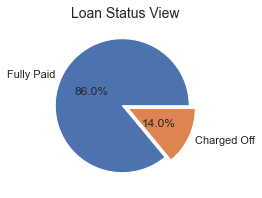

In [277]:
#Univaraite and segmented univariate analysis

pie, ax = plt.subplots(figsize=[3,4])
labels = clean_loan.loan_status.value_counts().keys()
plt.pie(x=clean_loan.loan_status.value_counts(), autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
#(100 * clean_loan.loan_status.value_counts()/len(clean_loan)).plot.pie()
plt.title('Loan Status View', fontsize=14)

In [278]:
#emp_length,grade,home_ownership,verification_status,

In [279]:
clean_loan.annual_inc.describe(percentiles=[0,0.25,0.30,0.50,0.75,.90,0.95,.99])/100

count      353.670000
mean       690.959854
std        639.670474
min         40.000000
0%          40.000000
25%        415.000000
30%        450.000000
50%        600.000000
75%        825.000000
90%       1150.000000
95%       1400.000000
99%       2300.000000
max      60000.000000
Name: annual_inc, dtype: float64

In [280]:
clean_loan = clean_loan[clean_loan['annual_inc'] <= clean_loan['annual_inc'].quantile(0.99)]

In [281]:
clean_loan1 = clean_loan.copy()

In [282]:
clean_loan1['annual_inc'] = pd.qcut(clean_loan1['annual_inc'], [0,.2,.4,.6,.8,1], ['VL','L','M','H','VH'])

In [283]:
clean_loan1.head()

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
1,2500,60,15.27,59.83,C,Ryder,0,RENT,VL,Source Verified,...,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,4,1999,12,2011
3,10000,36,13.49,339.31,C,AIR RESOURCES BOARD,10,RENT,L,Source Verified,...,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2,1996,12,2011
5,5000,36,7.90,156.46,A,Veolia Transportaton,3,RENT,VL,Source Verified,...,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,11,2004,12,2011
6,7000,60,15.96,170.08,C,Southern Star Photography,8,RENT,L,Not Verified,...,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,7,2005,12,2011
7,3000,36,18.64,109.43,E,MKC Accounting,9,RENT,L,Source Verified,...,0.00,0.00,2015-01-01,111.34,2014-12-01,0.0,1,2007,12,2011


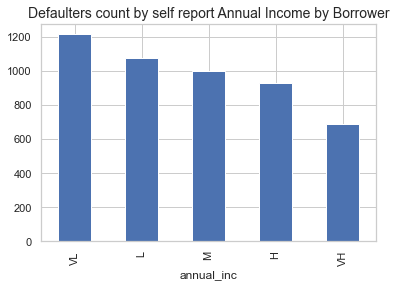

In [284]:
clean_loan1[clean_loan1['loan_status']=='Charged Off'].groupby(['annual_inc']).size().plot.bar()
plt.title("Defaulters count by self report Annual Income by Borrower", fontsize=14)
plt.show()

<h4> Above is the show for annual income defaulters count, when the income is getting lower the chances of defaulters can be more.</h4>

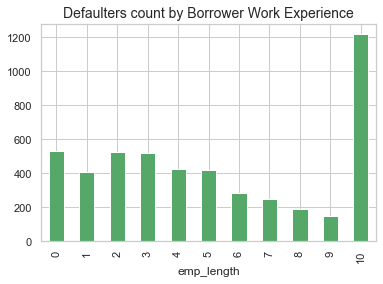

In [285]:
clean_loan1[clean_loan1['loan_status']=='Charged Off'].groupby(['emp_length']).size().plot.bar(color='g')
plt.title("Defaulters count by Borrower Work Experience", fontsize=14)
plt.show()

<h4> We could mostly belive that employee who has 10 or more years of experience has a higher chances to be defaulters</h4>

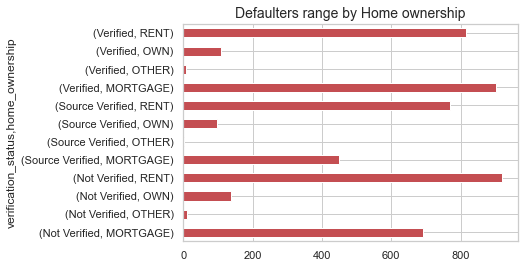

In [286]:
clean_loan1[clean_loan1['loan_status']=='Charged Off'].groupby(['verification_status','home_ownership']).size().plot.barh(color='r')
plt.title('Defaulters range by Home ownership', fontsize=14)
plt.show()

<h4> Looking at the above chart we can mostly conclude that borrower who are in rented ownership and mortgage are having more % of to be defaulter </h4>

<AxesSubplot:ylabel='None'>

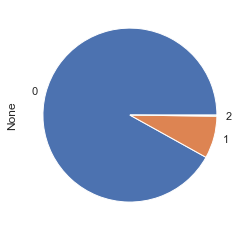

In [287]:
clean_loan1[clean_loan1['loan_status']=='Charged Off'].groupby('pub_rec').size().plot.pie()

In [288]:
clean_loan1['int_rate'].describe(percentiles=[0,.10,.25,.40,.50,.75,.90,.99])

count    35022.000000
mean        11.968215
std          3.695269
min          5.420000
0%           5.420000
10%          7.140000
25%          8.940000
40%         10.990000
50%         11.830000
75%         14.460000
90%         16.820000
99%         20.900000
max         24.400000
Name: int_rate, dtype: float64

In [289]:
clean_loan1['int_rate'] = clean_loan1[clean_loan1['int_rate'] < clean_loan1['int_rate'].quantile(0.99)]

In [290]:
clean_loan1['int_rate'] = pd.qcut(clean_loan1['int_rate'], [0,.2,.4,.6,.8,1], ['VLI', 'LI', 'MI', 'HI', 'VHI'])
#Very Low Interest - VLI

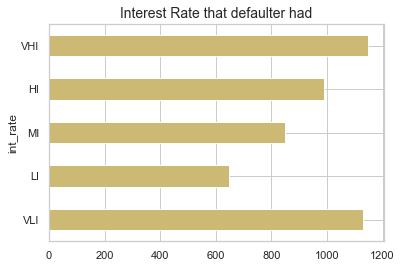

In [291]:
clean_loan1[clean_loan1['loan_status']=='Charged Off'].groupby('int_rate').size().plot.barh(color='y')
plt.title("Interest Rate that defaulter had", fontsize=14)
plt.show()

In [292]:
clean_loan1[clean_loan1['loan_status']=='Charged Off']['inq_last_6mths'].value_counts()

0    1990
1    1476
2     825
3     537
4      35
5      22
6      14
7       8
8       2
Name: inq_last_6mths, dtype: int64

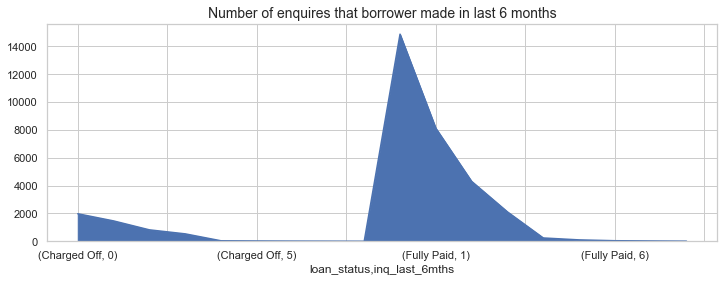

In [303]:
clean_loan1.groupby('loan_status')['inq_last_6mths'].value_counts().plot.area(figsize=(12, 4))
plt.title("Number of enquires that borrower made in last 6 months", fontsize=14)
plt.show()

<h4> We could not made any judgemental based on number of enquires made by the borrower. </h4>

In [294]:
clean_loan1.iloc[:,:19].head(2)

,loan_amnt,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec
1,2500,60,VLI,59.83,C,Ryder,0,RENT,VL,Source Verified,Charged Off,car,GA,1.0,0,1999-04-01,5,3,0
3,10000,36,MI,339.31,C,AIR RESOURCES BOARD,10,RENT,L,Source Verified,Fully Paid,other,CA,20.0,0,1996-02-01,1,10,0


In [295]:
clean_loan1.iloc[:,19:].head(2)

,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
1,1687,9.4,4,0.0,0.0,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,4,1999,12,2011
3,5598,21.0,37,0.0,0.0,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2,1996,12,2011


In [296]:
clean_loan1['dti'].describe(percentiles=[0.05,.10,.25,.90,.99])

count    35022.000000
mean        13.461859
std          6.621795
min          0.000000
5%           2.310000
10%          4.290000
25%          8.390000
50%         13.570000
90%         22.380000
99%         26.540000
max         29.990000
Name: dti, dtype: float64

In [297]:
clean_loan1 = clean_loan1[clean_loan1['dti'] <= clean_loan['dti'].quantile(0.99)]

In [298]:
clean_loan1['dti'] = pd.qcut(clean_loan1['dti'], [0,.2,.4,.6,.8,1], ['VL-DTI', 'L-DTI', 'M-DTI', 'H-DTI', 'VH-DTI'], precision=0)

In [304]:
clean_loan1.loc[:,['purpose','loan_status']].groupby(['loan_status','purpose']).size()


loan_status  purpose           
Charged Off  car                     148
             credit_card             471
             debt_consolidation     2469
             educational              44
             home_improvement        288
             house                    51
             major_purchase          187
             medical                  95
             moving                   78
             other                   540
             renewable_energy         14
             small_business          353
             vacation                 47
             wedding                  82
Fully Paid   car                    1225
             credit_card            4066
             debt_consolidation    14110
             educational             230
             home_improvement       2236
             house                   268
             major_purchase         1750
             medical                 518
             moving                  437
             other       

In [300]:
clean_loan.loc[clean_loan['loan_status']=='Charged Off', (['dti','term', 'addr_state', 'purpose'])].groupby(['addr_state','term','purpose']).mean().sort_values(by='dti',ascending=False)

,,,dti
addr_state,term,purpose,
MT,36,car,27.50
PA,36,renewable_energy,26.82
KY,36,house,25.50
WY,60,credit_card,25.13
HI,36,other,24.40
...,...,...,...
MS,36,wedding,1.00
TX,36,house,0.53
CO,60,vacation,0.45


In [307]:
master_loan = clean_loan1.copy()

In [308]:
def categoricalBarPlots(df, arr):
    rows = int(len(arr)/2)
    for idx, val in enumerate(arr, start=1):
        plt.subplot(rows, 2, idx)
        ax = df.groupby(val).loan_amnt.count().plot.bar(color=sns.color_palette('husl', 16))

    plt.tight_layout()

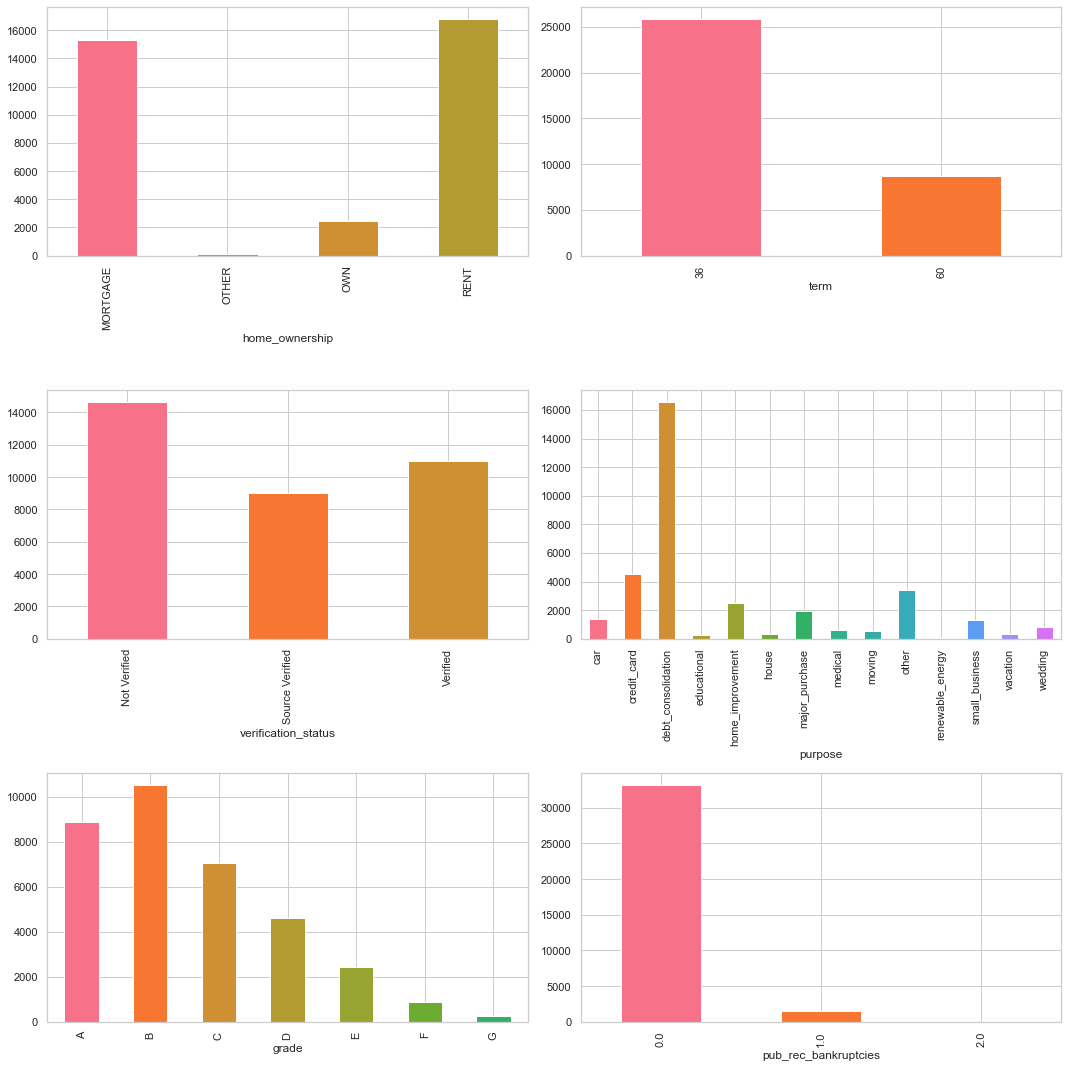

In [309]:
plt.figure(figsize=(15,15))

categoricalBarPlots(master_loan, ['home_ownership', 'term', 'verification_status', 'purpose', 'grade', 'pub_rec_bankruptcies'])

In [310]:
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (master_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (master_loan.loc[master_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    


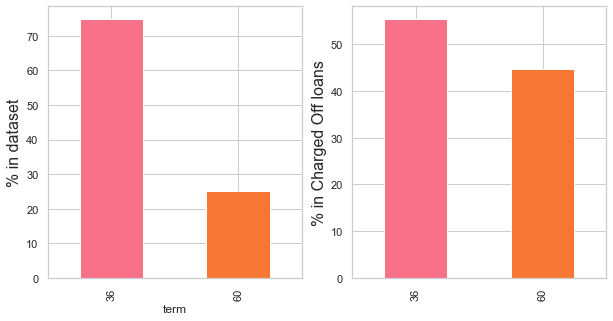

In [311]:
plt.figure(figsize=(10,5))
plot_percentages(master_loan, 'term')

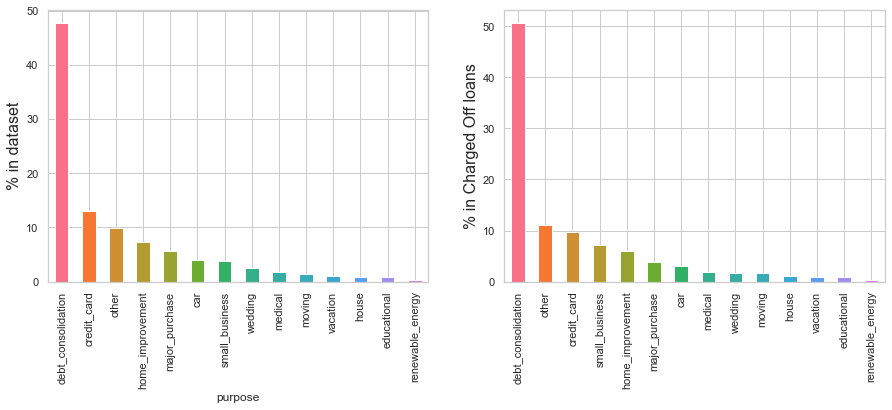

In [312]:
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'purpose')

In [313]:
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

<AxesSubplot:xlabel='purpose', ylabel='% of loans Charged Off'>

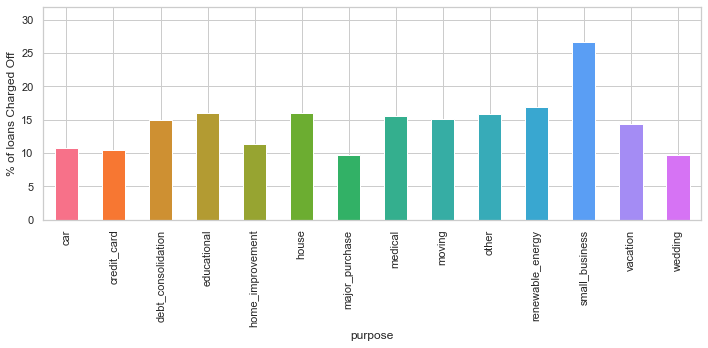

In [314]:
plt.figure(figsize=(10, 5))
plotLoanStatus(master_loan, 'purpose')

In [315]:
def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    #print(grp)
    percentages = grp.unstack() * 100 / cnt.T
    #print(percentages)
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='% of loans Charged Off'>

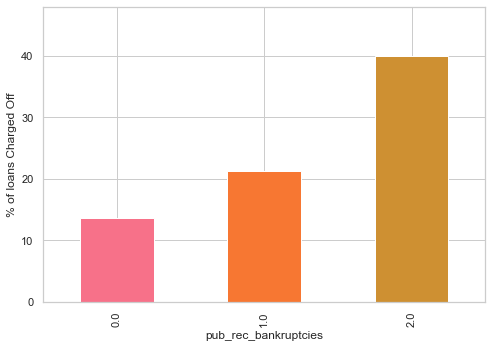

In [316]:
plt.figure(figsize=(7,5))
plotLoanStatus(master_loan, 'pub_rec_bankruptcies')

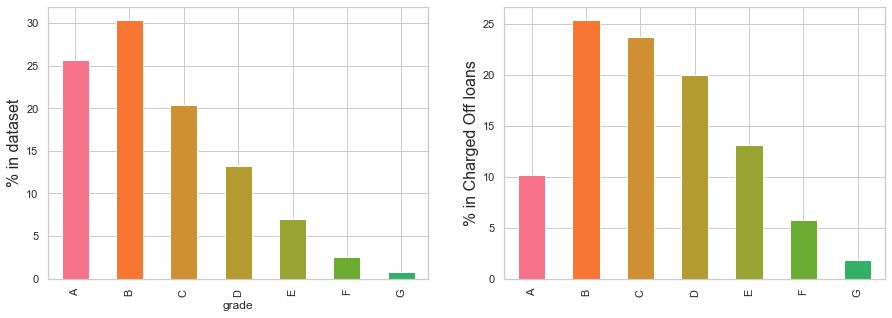

In [317]:
plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'grade', True)

In [318]:
top10_emp_title = master_loan.emp_title.value_counts(normalize=False).head(10)
top10_emp_title

US Army              124
Bank of America      106
IBM                   62
AT&T                  55
Kaiser Permanente     54
Wells Fargo           51
USAF                  51
UPS                   49
US Air Force          49
Walmart               43
Name: emp_title, dtype: Int64

Text(0.5, 0, 'Count of emp_title')

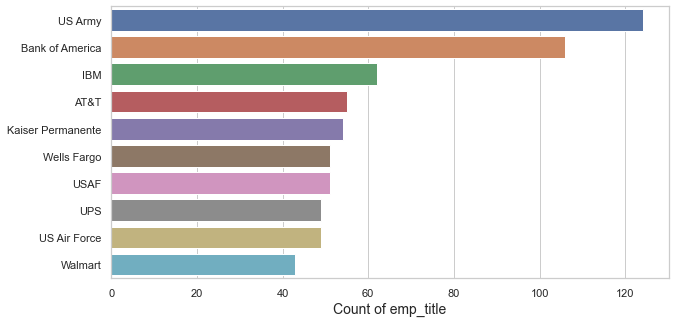

In [326]:
plt.figure(figsize=(10,5))
a=sns.barplot(x=top10_emp_title.values, y=top10_emp_title.index)
a.set_xlabel('Count of emp_title', fontsize =14)

<AxesSubplot:xlabel='emp_title', ylabel='% of loans Charged Off'>

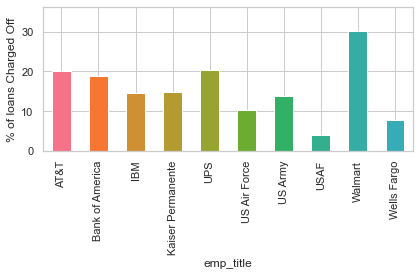

In [320]:
plotLoanStatus(master_loan[master_loan['emp_title'].isin(top10_emp_title.index.values)], 'emp_title')

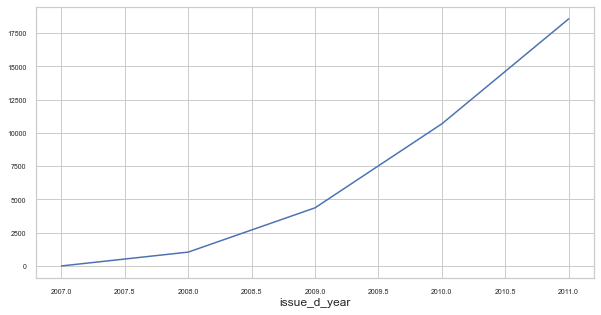

In [321]:
plt.figure(figsize=(10,5))
master_loan.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=7)
plt.show()

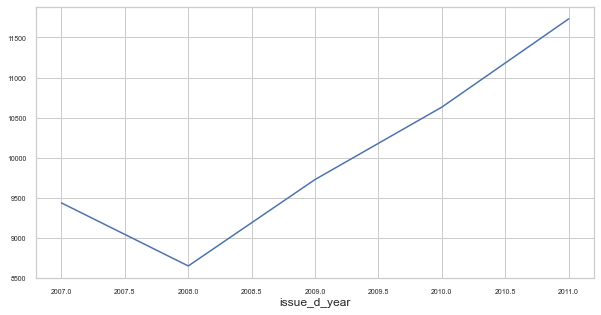

In [322]:
plt.figure(figsize=(10,5))
master_loan.groupby('issue_d_year').loan_amnt.mean().plot(kind='line', fontsize=7)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


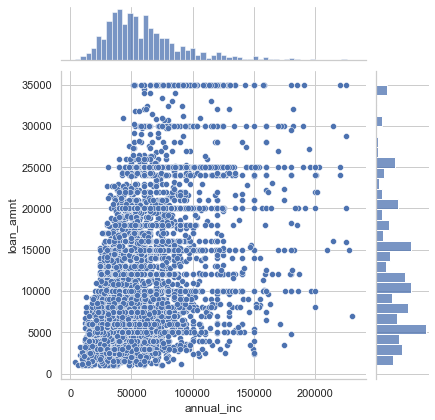

In [334]:
sns.jointplot('annual_inc', 'loan_amnt', clean_loan.loc[(clean_loan['annual_inc']<260000) & (clean_loan['loan_status'] == "Charged Off")])
plt.show()